In [0]:
# import library
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as implt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
%matplotlib inline

In [0]:
# import data and split label and image
# train = pd.read_csv("../input/train.csv")
path = "drive/Computers/Mon MacBook Air/ml-discover"
train = pd.read_csv(path + "/input/train.csv")
test = pd.read_csv(path + "/input/test.csv")

In [0]:
target = train.iloc[:8000,:1]
train = train.iloc[:8000,1:]
test = test.iloc[:1000,:]

In [0]:
# split data into 2 subdata like training dataset and testing dataset
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=0)

In [5]:
# we use support vector machine to classifier
# Note: return `label_train` to 1-D array by ravel() function
clf = svm.SVC()
clf.fit(X_train,y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
# defaults parameters of estimator "SVC"
clf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [0]:
y_pred = clf.predict(X_val)

In [8]:
print("prediction:", y_pred[:10])
print("real label:", y_val.values.ravel()[:10])

prediction: [1 1 1 1 1 1 1 1 1 1]
real label: [9 0 6 5 7 1 9 6 5 1]


In [9]:
from sklearn.metrics import accuracy_score
print("mean accuracy: ", accuracy_score(y_val.values.ravel(), y_pred))

mean accuracy:  0.11125


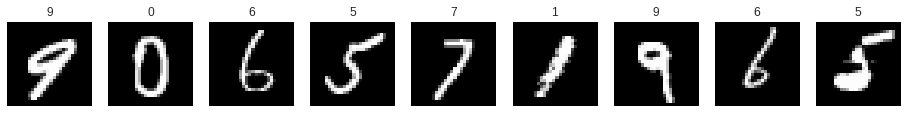

In [13]:
plt.rcParams['figure.figsize'] = [16, 8]
# show 5 image:
for i in range(9):
    plt.subplot(191 + i)
    img = X_val.iloc[i].values.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(y_val.iloc[i,0])

In [0]:
def show_detail_digit(data_test, results_of_model, number_of_digit):
    index_of_digit = [results_of_model == number_of_digit][0]
    f, axes = plt.subplots(9,9, sharex=True, sharey=True, figsize=(16,8))
    for r in range(9):
        for c in range(9):
            img = data_test.iloc[index_of_digit].iloc[r*9+c].values.reshape((28,28))
            axes[r,c].imshow(img, cmap='binary')

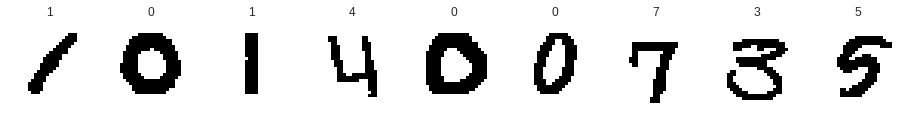

In [25]:
# show image black white
train.iloc[train>0] = 1
test.iloc[test>0] = 1

#show_detail_digit(image_train,label_train.values.ravel(), 3)

for i in range(9):
    plt.subplot(191 + i)
    img = train.iloc[i].values.reshape((28,28))
    plt.imshow(img, cmap='binary')
    plt.xticks([])
    plt.yticks([])
    plt.title(target.iloc[i,0])

In [0]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=0)

In [28]:
# We repeat the classification like above to see how's the performance going:
clf = svm.SVC()
clf.fit(X_train,y_train.values.ravel())

y_pred = clf.predict(X_val)
print("prediction:", y_pred[:10])
print("real label:", y_val.values.ravel()[:10])

print("mean accuracy: ", accuracy_score(y_val.values.ravel(), y_pred))

prediction: [9 0 6 5 7 1 9 6 6 1]
real label: [9 0 6 5 7 1 9 6 5 1]
mean accuracy:  0.915625


In [0]:
def show_img_failure_in_predict(data, true_target, pred_target, col_show):
  true_target = true_target.values.ravel()
  pred_target = pred_target.ravel()
  col = 0
  for i in range(len(pred_target)):
    if pred_target[i] != true_target[i]:
      plt.subplot(191 + col)
      img = data.iloc[i].values.reshape((28,28))
      plt.imshow(img, cmap="binary")
      plt.xticks([])
      plt.yticks([])
      plt.title("predict: {0} \ntrue: {1}".format(pred_target[i], true_target[i]))
      col += 1
    if col == col_show:
      break

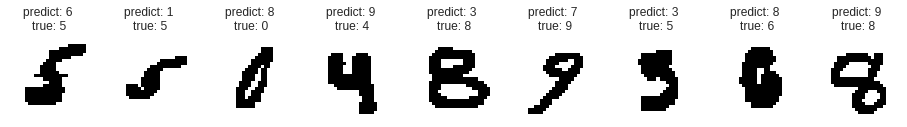

In [66]:
show_img_failure_in_predict(X_val, y_val, y_pred, 9)

## Improve model by using hyperparameter, in this case, we use GridSearchCV to exhausively find the combination of hyperparameter that have best model's performance

In [0]:
estimator = svm.SVC(kernel='rbf')
print("defaults parameters: ", estimator.get_params())

defaults parameters:  {'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [0]:
label_train_1D_array = label_train.values.ravel()

In [0]:
param_grid = {
    'C':[1, 5 , 7, 10],
    'gamma': [0.0001, 0.001, 0.01]
}

In [0]:
svc_params_selection = GridSearchCV(estimator, param_grid)
svc_params_selection.fit(image_train,label_train_1D_array)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 7, 10], 'gamma': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print(svc_params_selection.best_params_)
print(svc_params_selection.best_score_)
print(svc_params_selection.best_estimator_)

{'C': 7, 'gamma': 0.01}
0.9525
SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [0]:
pred = svc_params_selection.predict(image_test)

In [0]:
print("prediction:", pred[:10])
print("real label:", test[:10])

print("mean accuracy: ", svc_params_selection.score(image_test, label_test))

prediction: [4 7 6 9 2 7 8 1 4 2]
real label: [4 7 6 9 2 7 8 1 4 2]
mean accuracy:  0.94


## Run model on the test dataset

In [0]:
test_data=pd.read_csv('input/test.csv')
test_data[test_data>0]=1
results=svc_params_selection.predict(test_data[0:5000])

In [0]:
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv', header=True)

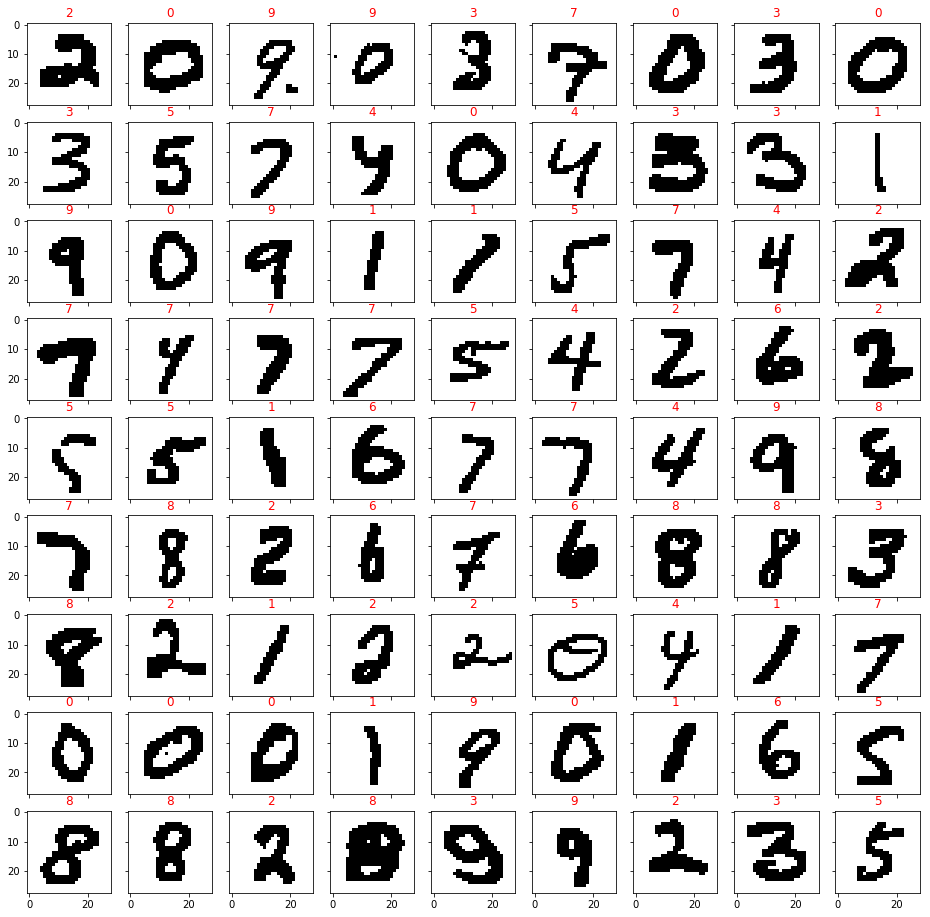

In [0]:
# show 10 image results:
f, axes = plt.subplots(9,9, sharex=True, sharey=True, figsize=(16,16))
for i in range(9):
    for j in range(9):
        img = test_data.iloc[i*9+j].values.reshape((28,28))
        axes[i,j].imshow(img, cmap='binary')
        axes[i,j].set_title(results[i*9+j], color='red')
        


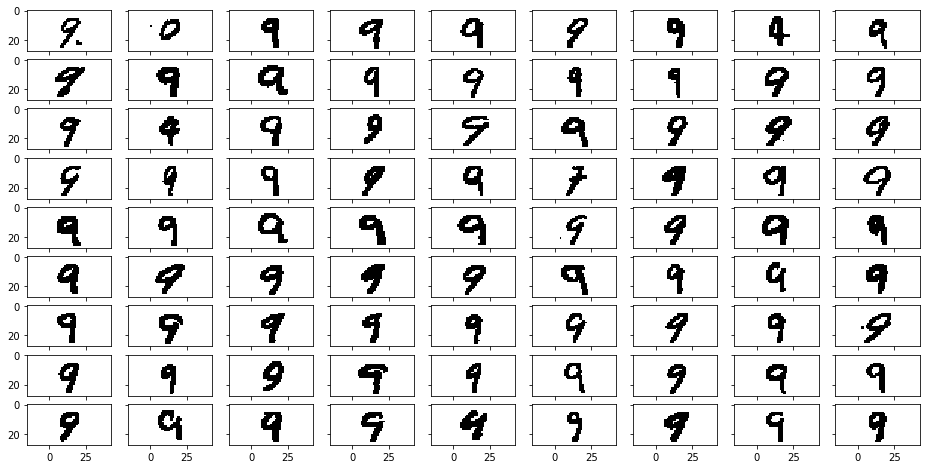

In [0]:
# show all of digit 0:
show_detail_digit(test_data, results, 9)